# Olympic Dataset 

## Basic Requirements

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn import preprocessing

## Creating the Dataframe to store "athletes_csv"

In [3]:
olympicdata = pd.read_csv('athlete_events.csv')
olympicdata.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Some interesting stuff to know about the Dataframe

Content
The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:

0 - ID - Unique number for each athlete

1 - Name - Athlete's name

2 - Sex - M or F

3 - Age - Integer

4 - Height - In centimeters

5 - Weight - In kilograms

6 - Team - Team name

7 - NOC - National Olympic Committee 3-letter code

8 - Games - Year and season

9 - Year - Integer

10 - Season - Summer or Winter

11 - City - Host city

12 - Sport - Sport

13 - Event - Event

14 - Medal - Gold, Silver, Bronze, or NA

# Data types and attributes

In [4]:
olympicdata.columns = olympicdata.columns.str.lower()
print(olympicdata.info())
print(olympicdata.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
id        271116 non-null int64
name      271116 non-null object
sex       271116 non-null object
age       261642 non-null float64
height    210945 non-null float64
weight    208241 non-null float64
team      271116 non-null object
noc       271116 non-null object
games     271116 non-null object
year      271116 non-null int64
season    271116 non-null object
city      271116 non-null object
sport     271116 non-null object
event     271116 non-null object
medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None
Index(['id', 'name', 'sex', 'age', 'height', 'weight', 'team', 'noc', 'games',
       'year', 'season', 'city', 'sport', 'event', 'medal'],
      dtype='object')


## Visualising the missing data

id             0
name           0
sex            0
age         9474
height     60171
weight     62875
team           0
noc            0
games          0
year           0
season         0
city           0
sport          0
event          0
medal     231333
dtype: int64


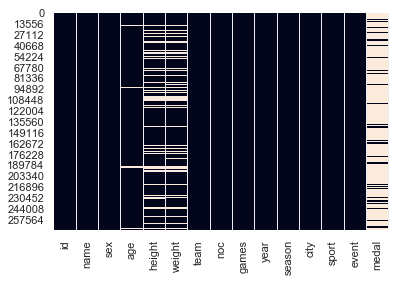

In [5]:
#Missing values with respect to each column in the dataset

sb.heatmap(olympicdata.isnull(), cbar=False)

#Showing missing values
print(olympicdata.isnull().sum())


From the table and the heatmap above, it shows that Age, Height, Weight and Medal have a lot of missing values. For Medals, its understandable as not all athletes who competed won medals. Hence, we can classify them as 'DNW' or rather Did Not Win.

In [6]:
# Replacing the values of Medal from NaN to DNW
olympicdata.columns=olympicdata.columns.str.lower()
olympicdata['medal'].fillna('DNW', inplace = True)

#Showing missing values again
print(olympicdata.isnull().sum())

id            0
name          0
sex           0
age        9474
height    60171
weight    62875
team          0
noc           0
games         0
year          0
season        0
city          0
sport         0
event         0
medal         0
dtype: int64


## Inclusion of NOC data

In [7]:
print(olympicdata.loc[:, ['noc', 'team']].drop_duplicates()['noc'].value_counts().head())


FRA    160
USA     97
GBR     96
SWE     52
NOR     46
Name: noc, dtype: int64


From the data above, it shows that FRA is asssociated with 160 teams. We can further include and compare with the given NOC data to justify this value.

In [8]:
# Lets read in the noc_country mapping first
noc_country = pd.read_csv("noc_regions.csv")

#Drop irrelevant data 'notes'
noc_country.drop('notes', axis = 1 , inplace = True)

noc_country.rename(columns = {'region':'country'}, inplace = True)
noc_country.rename(columns = {'NOC':'noc'}, inplace = True)

noc_country.head()

,noc,country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [9]:
# merging

olympics_merge = olympicdata.merge(noc_country,left_on = 'noc',right_on = 'noc', how = 'left')


# Checking which NOCs that didnt have a matching country in the master?
olympics_merge.loc[olympics_merge['country'].isnull(),['noc', 'team']].drop_duplicates()



,noc,team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


In [10]:
olympics_merge['country'] = np.where(olympics_merge['noc']=='SGP', 'Singapore', olympics_merge['country'])

olympics_merge['country'] = np.where(olympics_merge['noc']=='ROT', 'Refugee Olympic Athletes', olympics_merge['country'])

olympics_merge['country'] = np.where(olympics_merge['noc']=='UNK', 'Unknown', olympics_merge['country'])

olympics_merge['country'] = np.where(olympics_merge['noc']=='TUV', 'Tuvalu', olympics_merge['country'])

# Put these values from Country into Team
olympics_merge.drop('team', axis = 1, inplace = True)
olympics_merge.rename(columns = {'country': 'team'}, inplace = True)


In [11]:
#Displaying the values 

olympics_merge.head()

,id,name,sex,age,height,weight,noc,games,year,season,city,sport,event,medal,team
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands


# Exploratory Data Analysis

### First Part : Who has the most medals across all editions of the olympic???

In [12]:
#Firstly, I will classify the the medals column as 
# 1 - Gold, Silver, Bronze
# 0 - DNW

tally_olympics = olympics_merge

tally_olympics['Medal Won'] = np.where(tally_olympics.loc[:,'medal'] == 'DNW', 0, 1)

After careful analysis, some of the data presented actually shows the fact that some of these games are team events. Hence, a simple sum of the medals in the column would result in inaccurate results because there would be duplicates in the number of medals won.

Hence, we need to find out which team are team events in the first place.

In [13]:
# Check whether number of medals won in a year for an event by a team exceeds 1. This indicates a team event.
identify_team_events = pd.pivot_table(tally_olympics,
                                      index = ['team', 'year', 'event'],
                                      columns = 'medal',
                                      values = 'Medal Won',
                                      aggfunc = 'sum',
                                     fill_value = 0).drop('DNW', axis = 1).reset_index()

identify_team_events = identify_team_events.loc[identify_team_events['Gold'] > 1, :]

team_sports = list(identify_team_events['event'].unique())

# Print all team sports

print(team_sports)

"""
# Lets take data from summer olympics only
olympics_complete_summer = summer_olympics.loc[(summer_olympics['season'] == "Summer"), :]

# Reset row indices
olympics_complete_summer = olympics_complete_summer.reset_index()


#Check whether number of medals won in a year for an event by a team exceeds 1. This indicates a team event.
identify_team_events = pd.pivot_table(olympics_complete_summer,
                                      index = ['team', 'year', 'event'],
                                      columns = 'medal',
                                      values = 'Medal Won',
                                      aggfunc = 'sum',
                                     fill_value = 0).drop('DNW', axis = 1).reset_index()

identify_team_events = identify_team_events.loc[identify_team_events['Gold'] > 1, :]

team_sports = identify_team_events['event'].unique()

# Print all team sports

print(team_sports)
"""

["Polo Men's Polo", "Rowing Men's Double Sculls", "Basketball Men's Basketball", "Football Men's Football", "Cycling Men's Madison", "Hockey Men's Hockey", 'Sailing Mixed Multihull', "Rugby Men's Rugby", "Swimming Men's 4 x 200 metres Freestyle Relay", "Cycling Men's Tandem Sprint, 2,000 metres", "Athletics Women's 4 x 100 metres Relay", "Swimming Women's 4 x 100 metres Freestyle Relay", "Equestrianism Men's Three-Day Event, Team", 'Sailing Mixed 5.5 metres', 'Sailing Mixed Three Person Keelboat', 'Sailing Mixed Two Person Keelboat', "Swimming Men's 4 x 100 metres Medley Relay", "Cycling Men's Team Pursuit, 4,000 metres", "Hockey Women's Hockey", 'Equestrianism Mixed Three-Day Event, Team', "Rowing Men's Coxless Fours", "Rowing Women's Coxless Pairs", "Tennis Men's Doubles", "Beach Volleyball Women's Beach Volleyball", "Sailing Men's Two Person Dinghy", "Sailing Women's Two Person Dinghy", "Swimming Men's 4 x 100 metres Freestyle Relay", "Water Polo Women's Water Polo", "Rowing Men's C

'\n# Lets take data from summer olympics only\nolympics_complete_summer = summer_olympics.loc[(summer_olympics[\'season\'] == "Summer"), :]\n\n# Reset row indices\nolympics_complete_summer = olympics_complete_summer.reset_index()\n\n\n#Check whether number of medals won in a year for an event by a team exceeds 1. This indicates a team event.\nidentify_team_events = pd.pivot_table(olympics_complete_summer,\n                                      index = [\'team\', \'year\', \'event\'],\n                                      columns = \'medal\',\n                                      values = \'Medal Won\',\n                                      aggfunc = \'sum\',\n                                     fill_value = 0).drop(\'DNW\', axis = 1).reset_index()\n\nidentify_team_events = identify_team_events.loc[identify_team_events[\'Gold\'] > 1, :]\n\nteam_sports = identify_team_events[\'event\'].unique()\n\n# Print all team sports\n\nprint(team_sports)\n'

In [14]:
# From the team_sports data, not all of the data shown are 
# actually team sports as it can be seen that its because 
# two athletes had the same score/time, both were awarded 
# the gold medal.

remove_sports = ["Gymnastics Women's Balance Beam", "Gymnastics Men's Horizontal Bar", 
                 "Swimming Women's 100 metres Freestyle", "Swimming Men's 50 metres Freestyle"]

team_sports = list(set(team_sports) - set(remove_sports))

The next thing we need to do is add a column in the dataset that correctly identifies whether the event in the given record is a team event or a single event. We then use this column to correctly calculate the medal tally for each country.



In [15]:
# if an event name matches with one in team sports, then it is a team event. Others are singles events.
team_event_mask = tally_olympics['event'].map(lambda x: x in team_sports)
single_event_mask = [not i for i in team_event_mask]

# rows where medal_won is 1
medal_mask = tally_olympics['Medal Won'] == 1

# Put 1 under team event if medal is won and event in team event list
tally_olympics['Team Event'] = np.where(team_event_mask & medal_mask, 1, 0)

# Put 1 under singles event if medal is won and event not in team event list
tally_olympics['Single Event'] = np.where(single_event_mask & medal_mask, 1, 0)

# Add an identifier for team/single event
tally_olympics['Event Category'] = tally_olympics['Single Event'] + \
tally_olympics['Team Event']

"""

# if an event name matches with one in team sports, then it is a team event. Others are singles events.
team_event_mask = olympics_complete_summer['event'].map(lambda x: x in team_sports)
single_event_mask = [not i for i in team_event_mask]

# rows where medal_won is 1
medal_mask = olympics_complete_summer['Medal Won'] == 1

# Put 1 under team event if medal is won and event in team event list
olympics_complete_summer['Team Event'] = np.where(team_event_mask & medal_mask, 1, 0)

# Put 1 under singles event if medal is won and event not in team event list
olympics_complete_summer['Single Event'] = np.where(single_event_mask & medal_mask, 1, 0)

# Add an identifier for team/single event
olympics_complete_summer['Event Category'] = olympics_complete_summer['Single Event'] + \
olympics_complete_summer['Team Event']

"""

"\n\n# if an event name matches with one in team sports, then it is a team event. Others are singles events.\nteam_event_mask = olympics_complete_summer['event'].map(lambda x: x in team_sports)\nsingle_event_mask = [not i for i in team_event_mask]\n\n# rows where medal_won is 1\nmedal_mask = olympics_complete_summer['Medal Won'] == 1\n\n# Put 1 under team event if medal is won and event in team event list\nolympics_complete_summer['Team Event'] = np.where(team_event_mask & medal_mask, 1, 0)\n\n# Put 1 under singles event if medal is won and event not in team event list\nolympics_complete_summer['Single Event'] = np.where(single_event_mask & medal_mask, 1, 0)\n\n# Add an identifier for team/single event\nolympics_complete_summer['Event Category'] = olympics_complete_summer['Single Event'] + olympics_complete_summer['Team Event']\n\n"

In [16]:
#Tallying of medals

medal_tally = tally_olympics.\
groupby(['year', 'team', 'event', 'medal'])[['Medal Won', 'Event Category']].\
agg('sum').reset_index()

medal_tally['Medal Won Corrected'] = medal_tally['Medal Won']/medal_tally['Event Category']

#Display tally of medals
medal_tally

"""

#Tallying of medals

medal_tally = olympics_complete_summer.\
groupby(['year', 'team', 'event', 'medal'])[['Medal Won', 'Event Category']].\
agg('sum').reset_index()

medal_tally['Medal Won Corrected'] = medal_tally['Medal Won']/medal_tally['Event Category']

#Display tally of medals
medal_tally
"""

"\n\n#Tallying of medals\n\nmedal_tally = olympics_complete_summer.groupby(['year', 'team', 'event', 'medal'])[['Medal Won', 'Event Category']].agg('sum').reset_index()\n\nmedal_tally['Medal Won Corrected'] = medal_tally['Medal Won']/medal_tally['Event Category']\n\n#Display tally of medals\nmedal_tally\n"

In [17]:
# Medal Tally.
total_medal_tally = medal_tally.groupby(['year','team'])['Medal Won Corrected'].agg('sum').reset_index()

total_medal_tally_pivot = pd.pivot_table(total_medal_tally,
                     index = 'team',
                     columns = 'year',
                     values = 'Medal Won Corrected',
                     aggfunc = 'sum',
                     margins = True).sort_values('All', ascending = False)[1:5]

# print total medals won in the given period
total_medal_tally_pivot.loc[:,'All']

team
USA        2823.0
Russia     1916.0
Germany    1766.0
UK          919.0
Name: All, dtype: float64

### Conclusion : USA, Russia,  Germany, UK are the best countries of all time when it comes to winning medals from 1964 to 2016.

Text(0.5, 1.0, 'Olympic Performance Comparison')

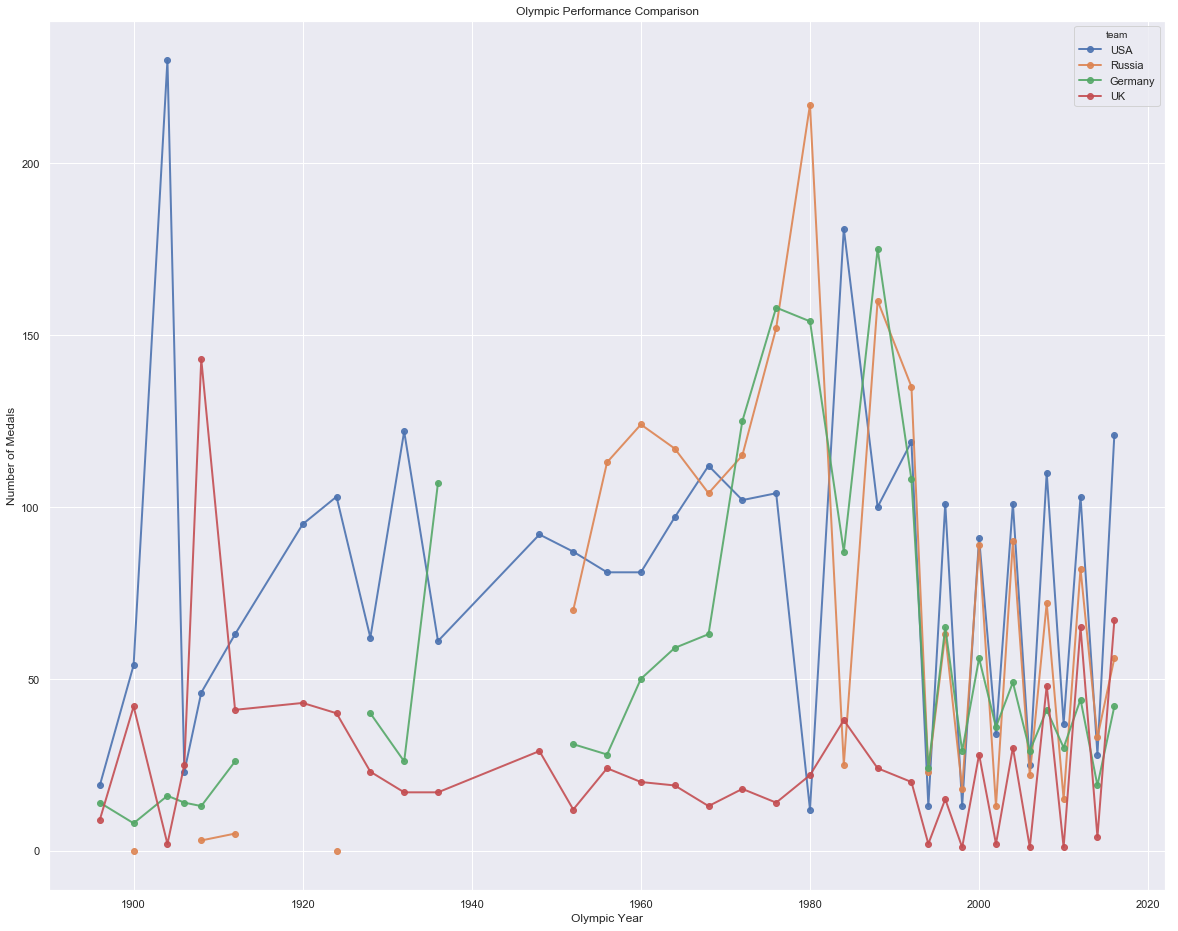

In [18]:
# List of top countries
top_countries = ['USA', 'Russia', 'Germany', 'UK']

year_team_medals = pd.pivot_table(total_medal_tally,
                                  index = 'year',
                                  columns = 'team',
                                  values = 'Medal Won Corrected',
                                  aggfunc = 'sum')[top_countries]

# plotting the medal tallies
year_team_medals.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (20,16), linewidth = 2)
plt.xlabel('Olympic Year')
plt.ylabel('Number of Medals')
plt.title('Olympic Performance Comparison')



### How are the medals distributed amongst these countries?

Text(0, 0.5, 'Country')

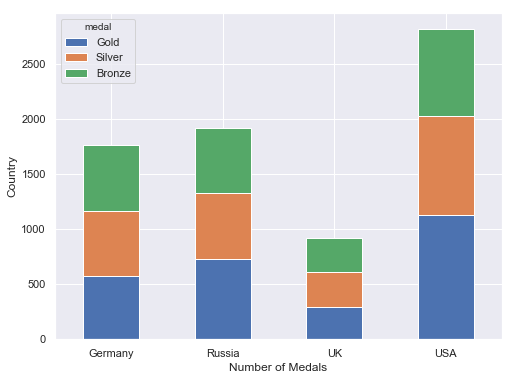

In [19]:
# List of top countries
top_countries = ['USA', 'Russia', 'Germany', 'UK']

# row mask where countries match
row_mask_2 = medal_tally['team'].map(lambda x: x in top_countries)

# Pivot table to calculate sum of gold, silver and bronze medals for each country
medal_tally_specific = pd.pivot_table(medal_tally[row_mask_2],
                                     index = ['team'],
                                     columns = 'medal',
                                     values = 'Medal Won Corrected',
                                     aggfunc = 'sum',
                                     fill_value = 0).drop('DNW', axis = 1)

# Re-order the columns so that they appear in order on the chart.
medal_tally_specific = medal_tally_specific.loc[:, ['Gold', 'Silver', 'Bronze']]

medal_tally_specific.plot(kind = 'bar', stacked = True, figsize = (8,6), rot = 0)
plt.xlabel('Number of Medals')
plt.ylabel('Country')

### Second Part : What sports are these countries good at ?

In [20]:
best_team_sports = pd.pivot_table(medal_tally[row_mask_2],
                                  index = ['team', 'event'],
                                  columns = 'medal',
                                  values = 'Medal Won Corrected',
                                  aggfunc = 'sum',
                                  fill_value = 0).sort_values(['team', 'Gold'], ascending = [True, False]).reset_index()

best_team_sports.drop(['Bronze', 'Silver', 'DNW'], axis = 1, inplace = True)
best_team_sports.columns = ['team', 'event', 'Gold_Medal_Count']

best_team_sports.groupby('team').head(5)

,team,event,Gold_Medal_Count
0,Germany,"Equestrianism Mixed Dressage, Team",11
1,Germany,Luge Men's Singles,10
2,Germany,Luge Mixed (Men)'s Doubles,10
3,Germany,Luge Women's Singles,10
4,Germany,Bobsleigh Men's Four,8
568,Russia,Figure Skating Mixed Pairs,13
569,Russia,Gymnastics Women's Team All-Around,10
570,Russia,"Wrestling Men's Heavyweight, Freestyle",10
571,Russia,Gymnastics Men's Horse Vault,8
572,Russia,Gymnastics Men's Individual All-Around,8


## Conclusion 

Germany mainly dominated the winter sports. Russia like a lot of gymnastics
UK and USA are more cardio-based.

# Male and Female and Total population sent to olympics over the years

In [21]:
# take for each year, the team, name of the athlete and gender of the athlete and drop duplicates. These are values
# where the same athlete is taking part in more than one sport.

# get rows with top countries
size_country = tally_olympics['team'].map(lambda x: x in top_countries)

year_team_gender = tally_olympics.loc[size_country, ['year','team', 'name', 'sex']].drop_duplicates()



In [22]:
# Create a pivot table to count gender wise representation of each team in each year
year_team_gender_count = pd.pivot_table(year_team_gender,
                                        index = ['year', 'team'],
                                        columns = 'sex',
                                        aggfunc = 'count').reset_index()

# rename columns as per column names in the 0th level
year_team_gender_count.columns = year_team_gender_count.columns.get_level_values(0)

# rename the columns appropriately
year_team_gender_count.columns = ['year', 'team', 'Female Athletes', 'Male Athletes']

# get total athletes per team-year
year_team_gender_count['Total Athletes'] = year_team_gender_count['Female Athletes'] + \
year_team_gender_count['Male Athletes']

In [23]:
# Separate country wise data

ger_data = year_team_gender_count[year_team_gender_count['team'] == "Germany"]
ger_data.fillna(0, inplace = True)
ger_data.set_index('year', inplace = True)

rus_data = year_team_gender_count[year_team_gender_count['team'] == "Russia"]
rus_data.set_index('year', inplace = True)

usa_data = year_team_gender_count[year_team_gender_count['team'] == "USA"]
usa_data.set_index('year', inplace = True)

uk_data = year_team_gender_count[year_team_gender_count['team'] == "UK"]
uk_data.set_index('year', inplace = True)

C:\Users\Chatterjee\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


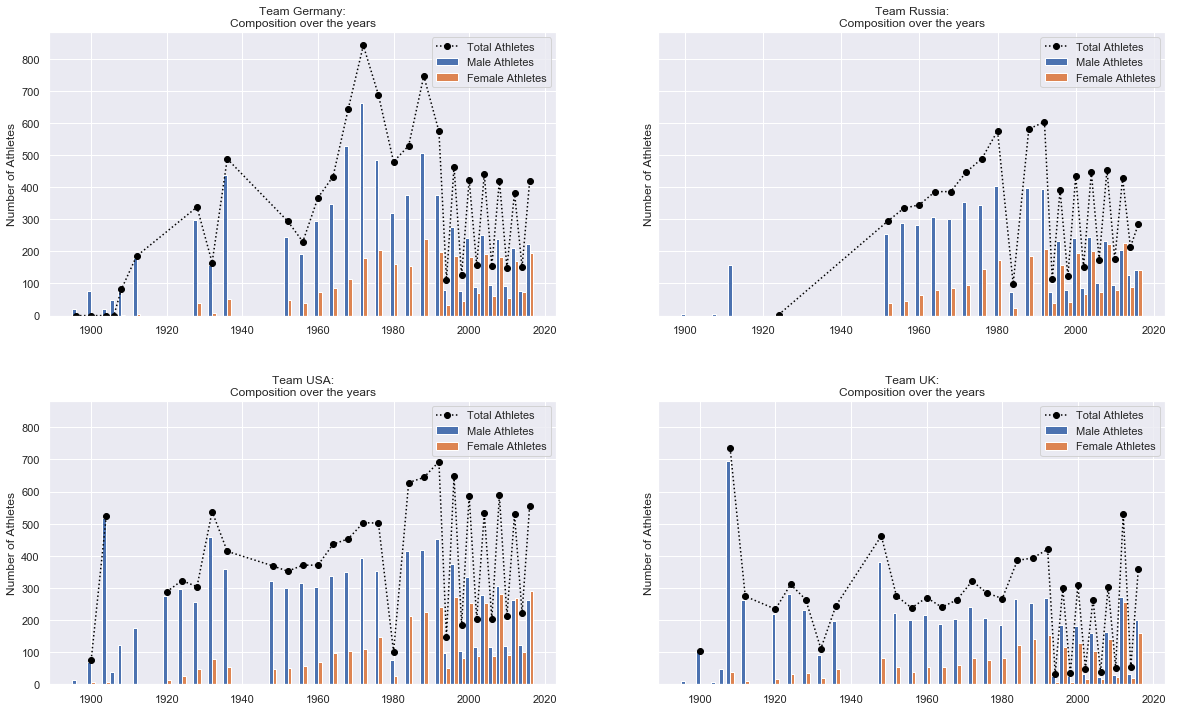

In [24]:
# Plot the values of male, female and total athletes using bar charts and the line charts.
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 12), sharey = True)
fig.subplots_adjust(hspace = 0.3)

# Plot team Germany's contingent size
ax1.bar(ger_data.index.values, ger_data['Male Athletes'], width = -1, align = 'edge', label = 'Male Athletes')
ax1.bar(ger_data.index.values, ger_data['Female Athletes'], width = 1, align = 'edge', label = 'Female Athletes')
ax1.plot(ger_data.index.values, ger_data['Total Athletes'], linestyle = ':', color = 'black', label = 'Total Athletes',
        marker = 'o')
ax1.set_title('Team Germany:\nComposition over the years')
ax1.set_ylabel('Number of Athletes')
ax1.legend(loc = 'best')


# Plot team Russia's contingent size
ax2.bar(rus_data.index.values, rus_data['Male Athletes'], width = -1, align = 'edge', label = 'Male Athletes')
ax2.bar(rus_data.index.values, rus_data['Female Athletes'], width = 1, align = 'edge', label = 'Female Athletes')
ax2.plot(rus_data.index.values, rus_data['Total Athletes'], linestyle = ':', color = 'black', label = 'Total Athletes',
        marker = 'o')
ax2.set_title('Team Russia:\nComposition over the years')
ax2.set_ylabel('Number of Athletes')
ax2.legend(loc = 'best')

# Plot team USA's contingent size
ax3.bar(usa_data.index.values, usa_data['Male Athletes'], width = -1, align = 'edge', label = 'Male Athletes')
ax3.bar(usa_data.index.values, usa_data['Female Athletes'], width = 1, align = 'edge', label = 'Female Athletes')
ax3.plot(usa_data.index.values, usa_data['Total Athletes'], linestyle = ':', color = 'black', label = 'Total Athletes',
        marker = 'o')
ax3.set_title('Team USA:\nComposition over the years')
ax3.set_ylabel('Number of Athletes')
ax3.legend(loc = 'best')

# Plot team USA's contingent size
ax4.bar(uk_data.index.values, uk_data['Male Athletes'], width = -1, align = 'edge', label = 'Male Athletes')
ax4.bar(uk_data.index.values, uk_data['Female Athletes'], width = 1, align = 'edge', label = 'Female Athletes')
ax4.plot(uk_data.index.values, uk_data['Total Athletes'], linestyle = ':', color = 'black', label = 'Total Athletes',
        marker = 'o')
ax4.set_title('Team UK:\nComposition over the years')
ax4.set_ylabel('Number of Athletes')
ax4.legend(loc = 'best')
           
plt.show()

# Do size of country affect the number of medals won ? 

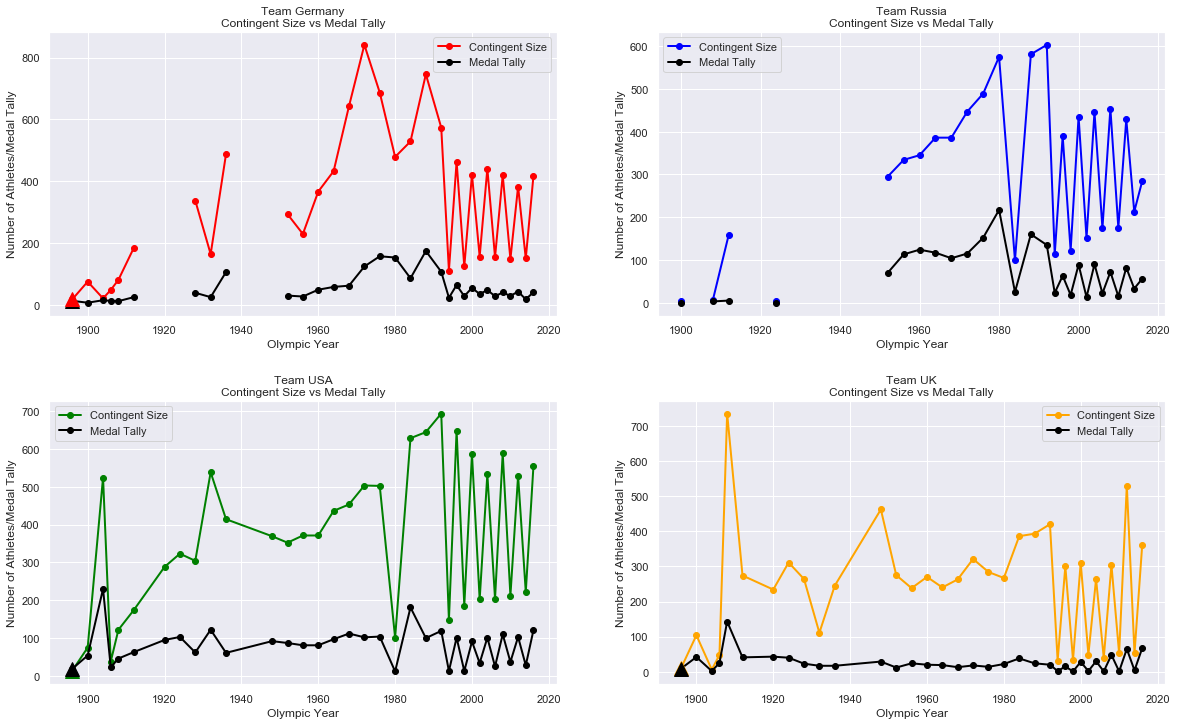

In [25]:
# Get year wise team wise athletes.
year_team_athelete = tally_olympics.loc[size_country, ['year','team', 'name']].drop_duplicates()

# sum these up to get total contingent size.
contingent_size = pd.pivot_table(year_team_athelete,
                                 index = 'year',
                                 columns = 'team',
                                 values = 'name',
                                 aggfunc = 'count')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2,
                                         ncols = 2,
                                        figsize = (20,12))

fig.subplots_adjust(hspace = 0.3)

# Plot Germany's medal tally and contingent size
contingent_size['Germany'].plot(ax = ax1, linestyle = '-', marker = 'o', linewidth = 2, color = 'red',
                               label = 'Contingent Size')
year_team_medals['Germany'].plot(ax = ax1, linestyle = '-', marker = 'o', linewidth = 2, color = 'black',
                                label = 'Medal Tally')
ax1.plot(1896, year_team_medals.loc[1896, 'Germany'], marker = '^', color = 'black', ms = 14)
ax1.plot(1896, contingent_size.loc[1896, 'Germany'], marker = '^', color = 'red', ms = 14)
ax1.set_xlabel('Olympic Year')
ax1.set_ylabel('Number of Athletes/Medal Tally')
ax1.set_title('Team Germany\nContingent Size vs Medal Tally')
ax1.legend(loc = 'best')

# Plot Russia's medal tally and contingent size
contingent_size['Russia'].plot(ax = ax2, linestyle = '-', marker = 'o', linewidth = 2, color = 'blue',
                              label = 'Contingent Size')
year_team_medals['Russia'].plot(ax = ax2, linestyle = '-', marker = 'o', linewidth = 2, color = 'black',
                               label = 'Medal Tally')
ax2.plot(1896, contingent_size.loc[1896, 'Russia'], marker = '^', color = 'blue', ms = 14)
ax2.plot(1896, year_team_medals.loc[1896, 'Russia'], marker = '^', color = 'black', ms = 14)
ax2.set_xlabel('Olympic Year')
ax2.set_ylabel('Number of Athletes/Medal Tally')
ax2.set_title('Team Russia\nContingent Size vs Medal Tally')
ax2.legend(loc = 'best')

# Plot USA's medal tally and contingent size
contingent_size['USA'].plot(ax = ax3, linestyle = '-', marker = 'o', linewidth = 2, color = 'green',
                              label = 'Contingent Size')
year_team_medals['USA'].plot(ax = ax3, linestyle = '-', marker = 'o', linewidth = 2, color = 'black',
                               label = 'Medal Tally')
ax3.plot(1896, contingent_size.loc[1896, 'USA'], marker = '^', color = 'green', ms = 14)
ax3.plot(1896, year_team_medals.loc[1896, 'USA'], marker = '^', color = 'black', ms = 14)
ax3.set_xlabel('Olympic Year')
ax3.set_ylabel('Number of Athletes/Medal Tally')
ax3.set_title('Team USA\nContingent Size vs Medal Tally')
ax3.legend(loc = 'best')

# Plot UK's medal tally and contingent size
contingent_size['UK'].plot(ax = ax4, linestyle = '-', marker = 'o', linewidth = 2, color = 'orange',
                              label = 'Contingent Size')
year_team_medals['UK'].plot(ax = ax4, linestyle = '-', marker = 'o', linewidth = 2, color = 'black',
                               label = 'Medal Tally')
ax4.plot(1896, contingent_size.loc[1896, 'UK'], marker = '^', color = 'orange', ms = 14)
ax4.plot(1896, year_team_medals.loc[1896, 'UK'], marker = '^', color = 'black', ms = 14)
ax4.set_xlabel('Olympic Year')
ax4.set_ylabel('Number of Athletes/Medal Tally')
ax4.set_title('Team UK\nContingent Size vs Medal Tally')
ax4.legend(loc = 'best')


In [26]:
# Lets merge contingent size and medals won!
year_team_medals_unstack = year_team_medals.unstack().reset_index()
year_team_medals_unstack.columns = ['team','year', 'Medal Count']

contingent_size_unstack = contingent_size.unstack().reset_index()

contingent_size_unstack.columns = ['team','year', 'Contingent']

contingent_medals = contingent_size_unstack.merge(year_team_medals_unstack,
                                                 left_on = ['team', 'year'],
                                                 right_on = ['team', 'year'])

contingent_medals[['Contingent', 'Medal Count']].corr()

,Contingent,Medal Count
Contingent,1.000000,0.802781
Medal Count,0.802781,1.000000


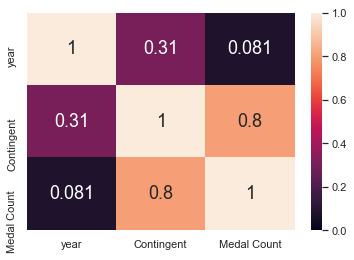

In [27]:
sb.heatmap(contingent_medals.corr(),vmin=0,vmax=1,annot=True,annot_kws={'size':18})

High correlation of 0.8 that means that they are highly correlated! 

In [28]:
#Dropping the rows which contain null values.(Age,Weight,Height)
olympics_merge=olympics_merge.dropna(axis=0,how='any')
olympics_merge.drop(columns=['Team Event','Single Event','Event Category'],inplace=True)
olympics_merge.head(n=100)

C:\Users\Chatterjee\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,id,name,sex,age,height,weight,noc,games,year,season,city,sport,event,medal,team,Medal Won
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,0
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",DNW,Netherlands,0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,0
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",DNW,Netherlands,0
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,0
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",DNW,Netherlands,0
10,6,Per Knut Aaland,M,31.0,188.0,75.0,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,DNW,USA,0
11,6,Per Knut Aaland,M,31.0,188.0,75.0,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,DNW,USA,0


In [29]:
#Pramurta's Part

In [30]:
#Storing all the countries, sports and years in a Series object
Years=pd.Series(olympics_merge['year']).unique()
Countries=pd.Series(olympics_merge['team']).unique()
Sports=pd.Series(olympics_merge['sport']).unique()

In [31]:
#Taking the user input
while 1:
    year=int(input('Enter the year:\n'))
    if year in Years:
        break
    else:
        print('Enter correctly!\n')
while 1:
    sport=input('Enter the sport:\n')
    if sport in Sports:
        break
    else:
        print('Enter correctly!\n')
while 1:
    country=input('Enter the country:\n')
    if sport in Sports:
        break
    else:
        print('Enter correctly!\n')

Enter the year:
2000
Enter the sport:
Basketball
Enter the country:
China


In [32]:
#Preparing the training and test dataset for X. Also we are creating the dataset for predicting the medal in that particular year
X_train=pd.DataFrame(olympics_merge[['age','height','weight']][(olympics_merge['year']<year)  & (olympics_merge['sport']==sport) & (olympics_merge['team']==country) ])
X_test=pd.DataFrame(olympics_merge[['age','height','weight']][(olympics_merge['year']>=year) &  (olympics_merge['sport']==sport) & (olympics_merge['team']==country)])
X_test_pred=pd.DataFrame(olympics_merge[['age','height','weight']][(olympics_merge['year']==year) &  (olympics_merge['sport']==sport) & (olympics_merge['team']==country)])

In [33]:
#'Medal Won' Train and Test dataset
y_train=pd.DataFrame(olympics_merge['Medal Won'][(olympics_merge['year']<year)  & (olympics_merge['sport']==sport) & (olympics_merge['team']==country)])
y_test=pd.DataFrame(olympics_merge['Medal Won'][(olympics_merge['year']>=year)  & (olympics_merge['sport']==sport) & (olympics_merge['team']==country)])

In [34]:
a=len(y_train[y_train['Medal Won']==1])
b=len(y_train[y_train['Medal Won']==0])
c=len(y_train)
flag=0

In [35]:
if (c==b):
    print('The probability of '+country+ ' winning a medal in '+sport +' in the year '+str(year)+' is 0.')
    flag=1
elif (c==b) & (not y_test.empty) | (c==a & (not y_test.empty)):
    print(country+' did not qualify for '+sport+' in the year '+str(year))
    flag=1
elif (c==a):
    print('The probability of '+country+ ' winning a medal in '+sport+' in the year '+ str(year)+ ' is 1.')
    flag=1
else:    
    import sklearn as sk  
    from sklearn.linear_model import LogisticRegression 
    logmodel=LogisticRegression()
    logmodel.fit(X_train, y_train.values.ravel())
    y_pred = logmodel.predict(X_test)
    y_pred_proba = logmodel.predict_proba(X_test)
    if not X_test_pred.empty:
        y_test_pred_proba = logmodel.predict_proba(X_test_pred)

C:\Users\Chatterjee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
if (not X_test_pred.empty) & (flag==0):
    s=0.0
    c=int(len(y_test_pred_proba))
    l=int(c/2)
    for i in range(l):
        for j in range(2):
            s+=y_test_pred_proba[i][1]
    olympic_pred=s/c

In [37]:
if flag==0:
    from sklearn.metrics import classification_report
    from sklearn.metrics import accuracy_score
    print(classification_report(y_test,y_pred))
    print("Accuracy:",accuracy_score(y_test, y_pred))
    if not X_test_pred.empty:
        print('The probability of '+country+ ' winning a medal in '+sport+' in the year '+str(year)+ ' is: '+str(olympic_pred))
    else:
        print('No sportsperson from '+country+' played '+sport+' in the year '+str(year)+'. They could not qualify for '+sport+ ' in the '+str(year)+ ' Olympics.') 
else:
    print('Accuracy: 1')

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       108
           1       0.00      0.00      0.00         0

   micro avg       0.93      0.93      0.93       108
   macro avg       0.50      0.46      0.48       108
weighted avg       1.00      0.93      0.96       108

Accuracy: 0.9259259259259259
The probability of China winning a medal in Basketball in the year 2000 is: 0.15383446356835814


C:\Users\Chatterjee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Chatterjee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Chatterjee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [38]:
if flag==0:
    from sklearn import metrics
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    cnf_matrix

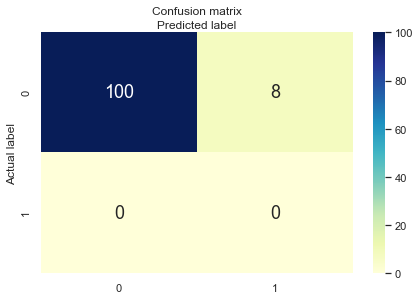

In [39]:
if flag==0:
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g',annot_kws={'size':18})
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')